# Name - Jaekisen Agarwal


### Import libraries

In [141]:
import pandas as pd     #for data preprocessing
import numpy as np      #for data augumentation
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
import seaborn as sns 
from sklearn.cluster import KMeans

### Load the dataset 

In [8]:
path=r"C:\Users\acer\Downloads\Iris.csv"
iris_data=pd.read_csv(path,index_col='Id')
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris_data.shape

(150, 5)

In [11]:
iris_data.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

### For unsupervised learning lets drop the class Species column  <br>
 We have 3 classes lets see that can our model  determine the correct value of k that is 3.
 

In [56]:
data=iris_data.iloc[:,:4]
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


### Defining model and optimizing the hyper-parameters

In [19]:
score=[]
for r in range(1,11):
    model=KMeans(n_clusters=r,max_iter=300,init ='k-means++',random_state=1)
    model.fit(data)
    score.append(model.inertia_)

### Plot the elbow curve to find optimal value of k

[Text(0, 0.5, 'Inertia score'),
 Text(0.5, 0, 'value of k'),
 Text(0.5, 1.0, 'Elbow curve')]

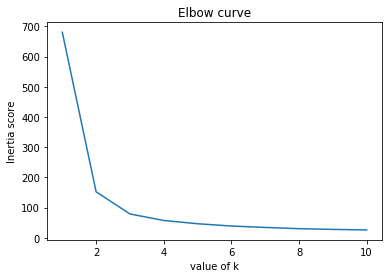

In [49]:
vis=sns.lineplot(x=range(1,11),y=score)
vis.set(xlabel='value of k', ylabel='Inertia score', title='Elbow curve')


Optimal value of k='3' 

#### Lets again build the model with the value of k as 3

In [52]:
model=KMeans(n_clusters=3,max_iter=300,init ='k-means++',random_state=1,)
model.fit(data)
    

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [138]:
model.predict(data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### Map the predicted values with their original labels

In [139]:
iris_data['Prediction']=model.predict(data)
df=iris_data.loc[:,["Species","Prediction"]]

for r in df.Species.unique():
    for s in [0,1,2]:
        if (df.loc[(df.Species==r)&(df.Prediction==s)].shape[0]!=0):
            print(f"label={r} and pred={df.loc[(df.Species==r)&(df.Prediction==s)].shape[0]} times {s}")

label=Iris-setosa and pred=50 times 1
label=Iris-versicolor and pred=48 times 0
label=Iris-versicolor and pred=2 times 2
label=Iris-virginica and pred=14 times 0
label=Iris-virginica and pred=36 times 2


    Rename the predicted labels 
        

In [140]:
def trans(x):
    if x==1:
        return "Iris-setosa"
    elif(x==0):
        return "Iris-versicolor"
    elif(x==2):
        return "Iris-virginica"
df.Prediction=df.Prediction.apply(trans) 
df.Prediction.value_counts()

Iris-versicolor    62
Iris-setosa        50
Iris-virginica     38
Name: Prediction, dtype: int64

### plot the confusion matrix for model evaluation

Predicted        Iris-setosa  Iris-versicolor  Iris-virginica  All
Actual                                                            
Iris-setosa               50                0               0   50
Iris-versicolor            0               48               2   50
Iris-virginica             0               14              36   50
All                       50               62              38  150


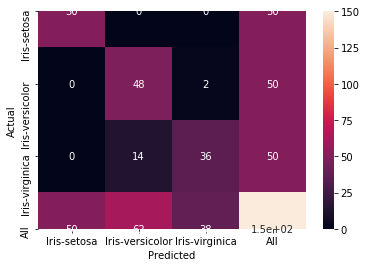

In [119]:
confusion_matrix = pd.crosstab(df['Species'], df['Prediction'], rownames=['Actual'], colnames=['Predicted'],margins=True)
print(confusion_matrix)
sns.heatmap(confusion_matrix,annot=True)
plt.show()

### Let's visualize the clusters by ploting first two rows 

In [137]:
iris_data["Prediction"]=df.Prediction

Text(0.5, 1.0, 'Predicted Clusters')

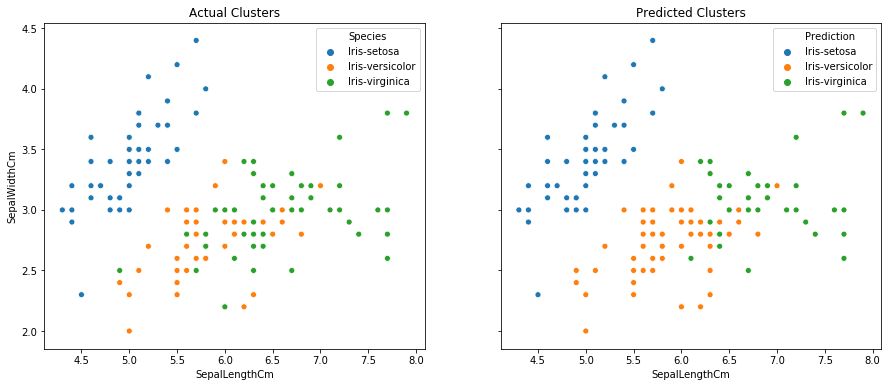

In [136]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
sns.scatterplot(ax=axes[0],data=iris_data, x="SepalLengthCm", y="SepalWidthCm", hue="Species")
axes[0].set_title("Actual Clusters")
sns.scatterplot(ax=axes[1],data=iris_data, x="SepalLengthCm", y="SepalWidthCm", hue="Prediction")
axes[1].set_title('Predicted Clusters')
